In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

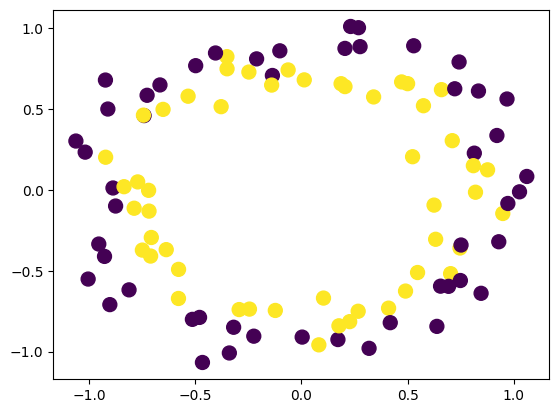

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

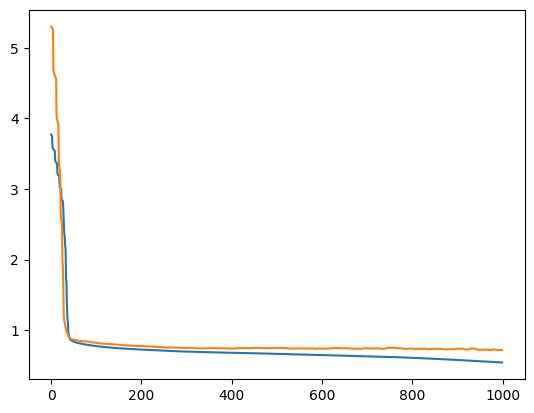

In [8]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


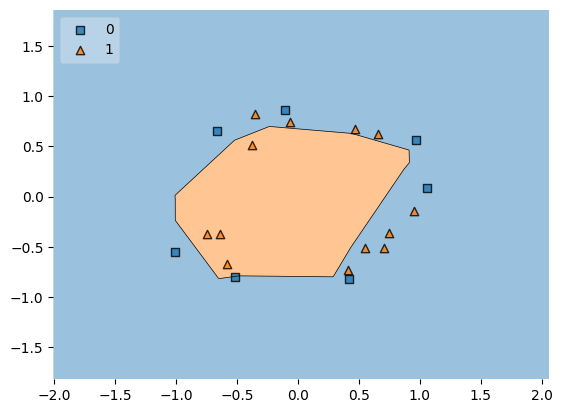

In [9]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

In [ ]:
# Early Stopping

In [ ]:
model1 = Sequential()
model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history1 = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=callback,verbose=0)

Epoch 21: early stopping


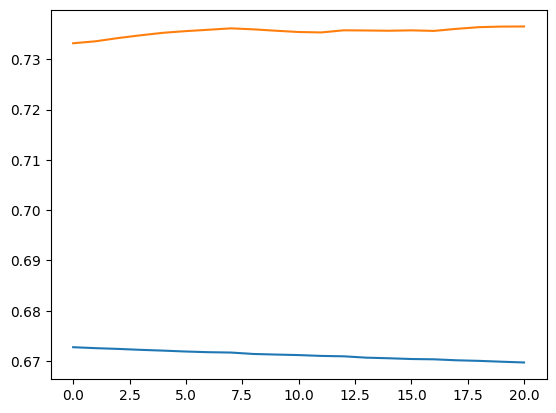

In [ ]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='test')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


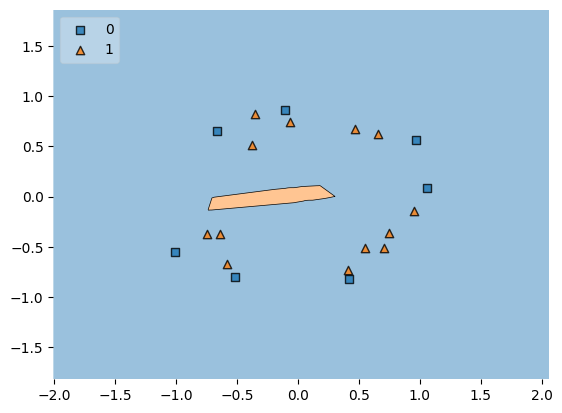

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf=model1,legend=2)
plt.show()